<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/year_dream/01_numpy_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression Numpy Implementation

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)

In [3]:
def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100


    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot



    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()

In [4]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) # Linear regression output을 뱉어준다! f(x) = w1*x +w0

def cost(theta0, theta1, X, y): # cost => loss term => MSE
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    return costValue

def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    '''
    f(x) = wx + b
    Loss = (y - wx -b) ** 2
    dLoss / dw = 2 * (y - ws -b) * x.   <= 미분
    dLoss / dw = 2 * (y - f(x)) * x
    '''
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha): # alpha => Learning rate
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [5]:
def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

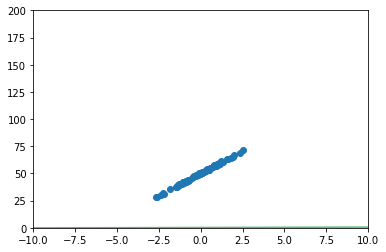

[128284.17060308]


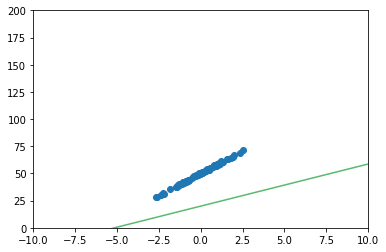

[46633.40137624]


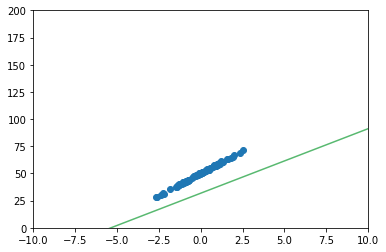

[16981.54759187]


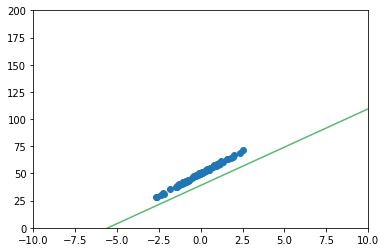

[6195.18530061]


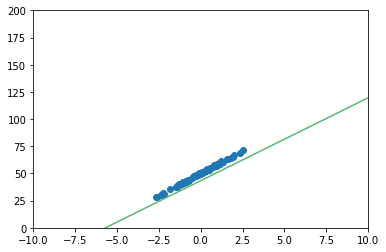

[2265.76356554]


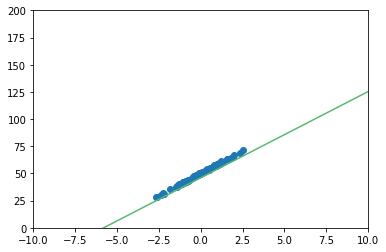

[832.50660533]


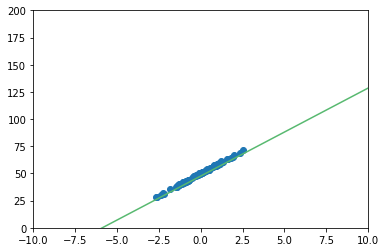

[309.16669217]


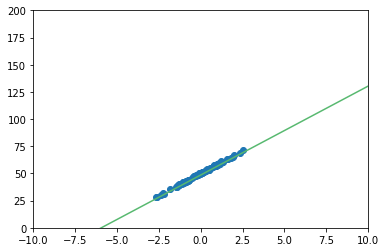

[117.89934023]


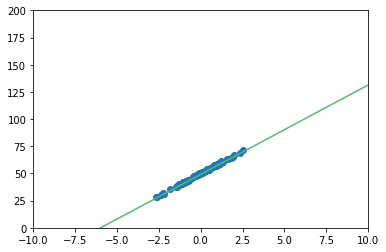

[47.94141423]


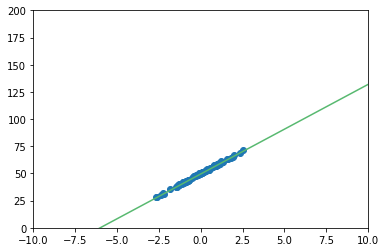

[22.33657536]


In [6]:
LinearRegression(X, y)

# 2. Ridge Regression Numpy Implementation

In [13]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Ridge_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y): # 페널티 term이 들어가야함
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    penalty = 0.01 * theta1 * theta1
    costValue += penalty
    return costValue

def Ridge_derivatives(theta0, theta1, X, y): # mse + 페널티니까 무언가 변해야하는것이 있음
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    dtheta1 += 2 * 0.01 * theta1
    
    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Ridge_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [11]:
def RidgeRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Ridge_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

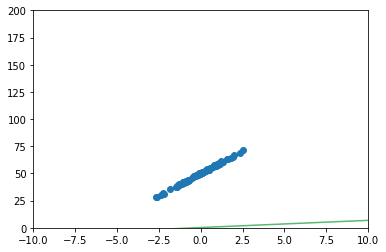

[127930.28196872]


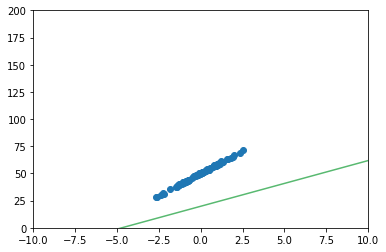

[47249.13107679]


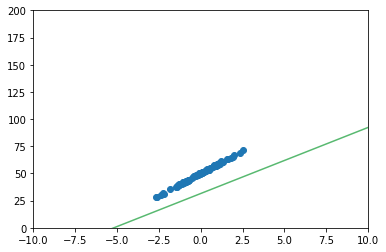

[18500.14177599]


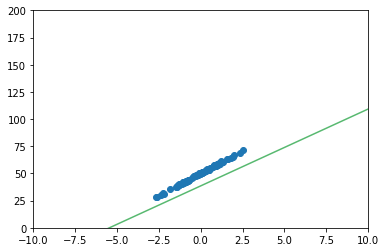

[8240.37728385]


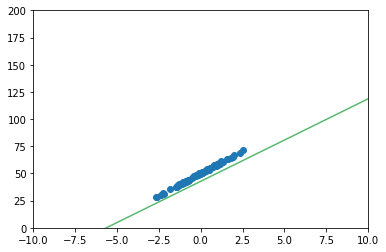

[4574.114506]


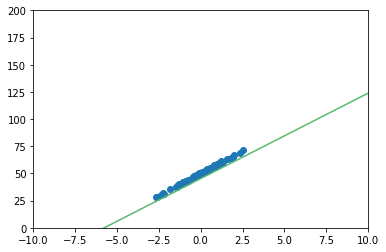

[3262.51891398]


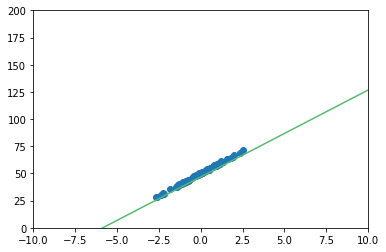

[2792.8456532]


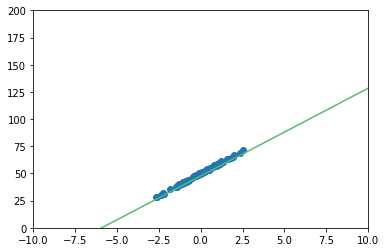

[2624.52008058]


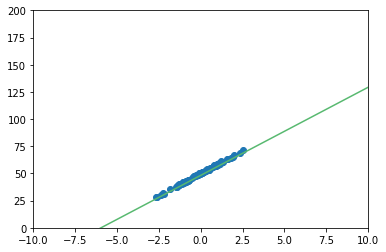

[2564.15163449]


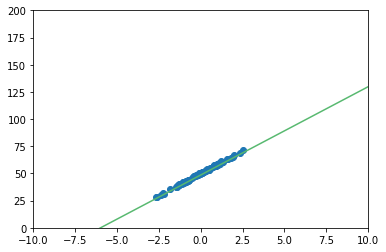

[2542.48805715]


In [12]:
RidgeRegression(X, y)

# 3. Lasso Regression Numpy Implementation

In [17]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Lasso_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    penalty = 0.01 * abs(theta1)
    costValue += penalty
    return costValue

def Lasso_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi
    
    dw = 0.01 if theta1 >= 0 else -0.01
    dtheta1 += dw
    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Lasso_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [18]:
def LassoRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Lasso_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

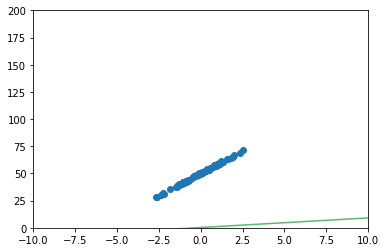

[127535.64316249]


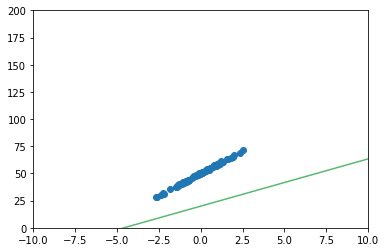

[46424.93992261]


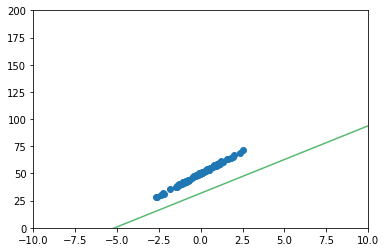

[16925.64972243]


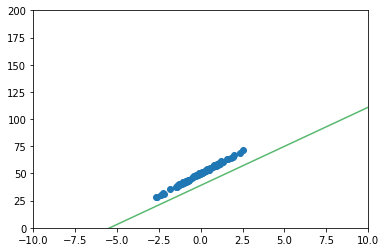

[6181.1063905]


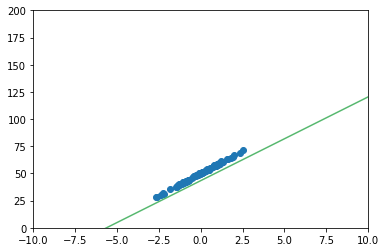

[2262.63138769]


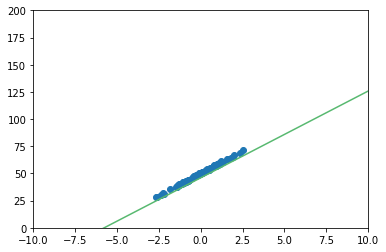

[832.0251636]


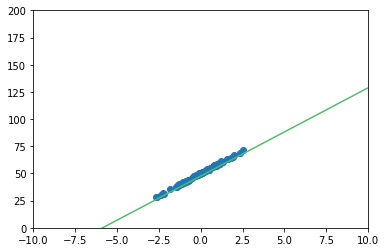

[309.23358295]


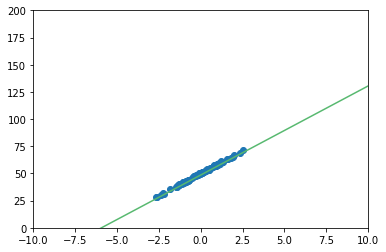

[118.03561188]


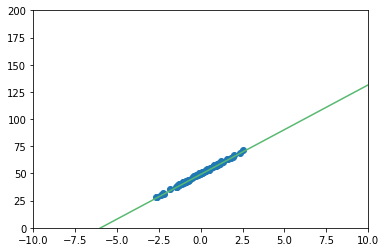

[48.06218458]


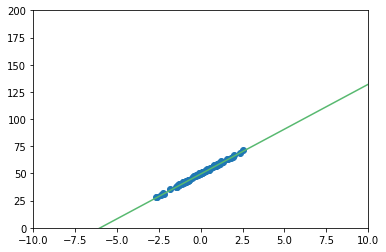

[22.4389283]


In [19]:
LassoRegression(X, y)

# 4. ElasticNet Numpy Implementation  (HW1)

In [20]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def EN_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    R_penalty = 0.01 * theta1 * theta1
    L_penalty = 0.01 * abs(theta1)
    costValue += R_penalty + L_penalty
    return costValue

def EN_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi
    dw = 0.01 if theta1 >= 0 else -0.01 # Ridge
    dtheta1 += dw
    dtheta1 += 2 * 0.01 * theta1 # Lasso

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = EN_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [21]:
def ENRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(EN_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

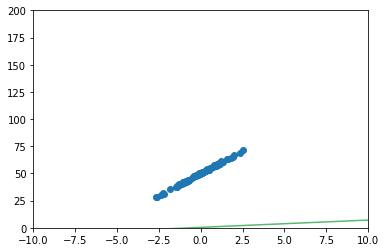

[127018.22617228]


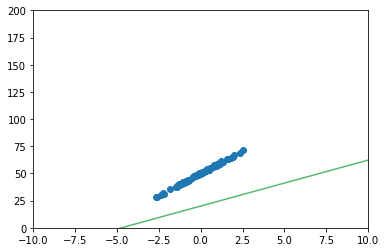

[46219.6595877]


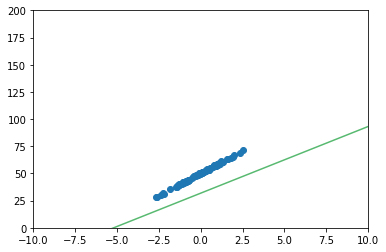

[16845.84113912]


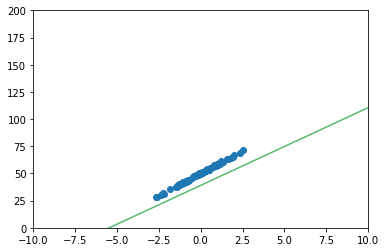

[6150.72810785]


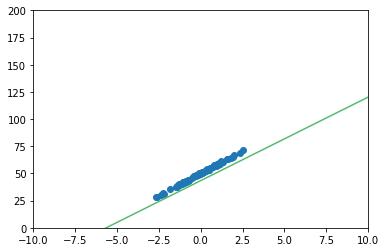

[2251.44249958]


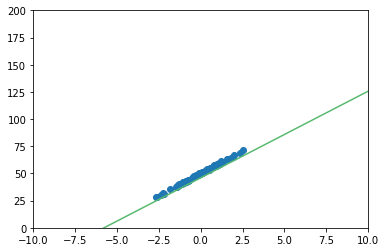

[828.20407304]


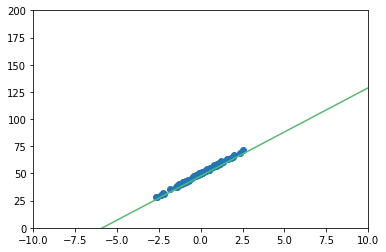

[308.21749188]


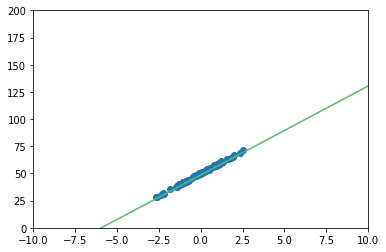

[118.08036183]


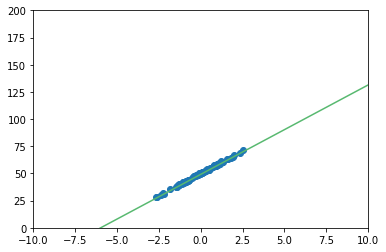

[48.5060403]


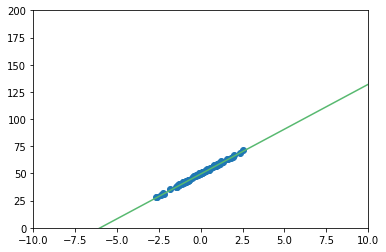

[23.03230432]


In [22]:
ENRegression(X, y)